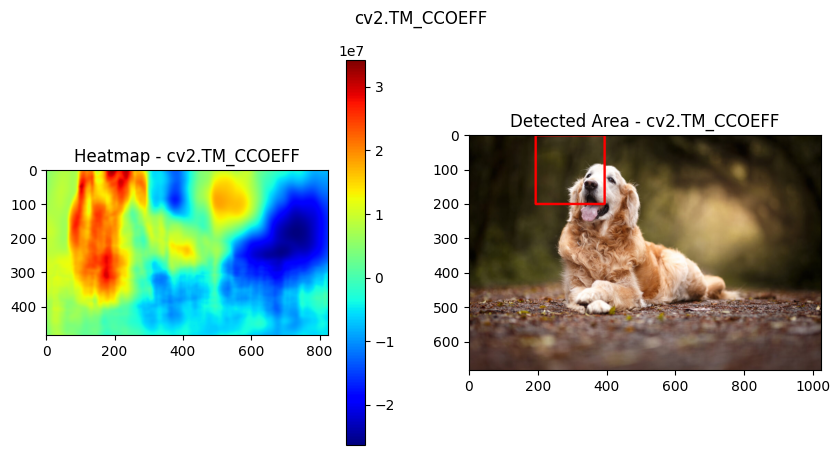

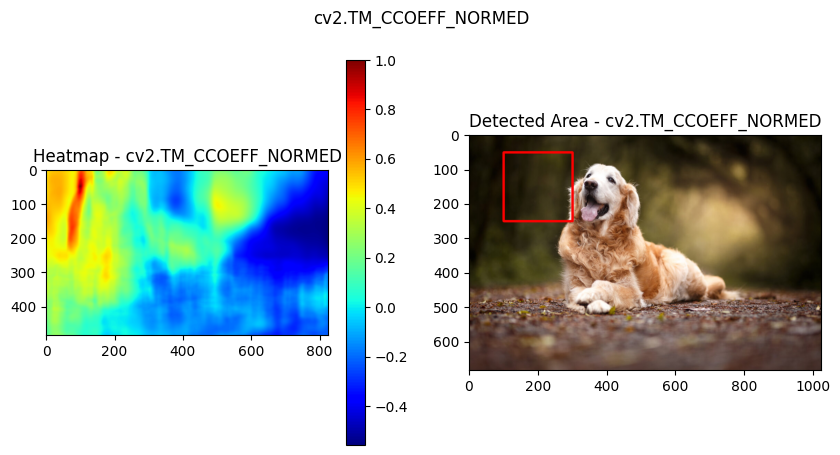

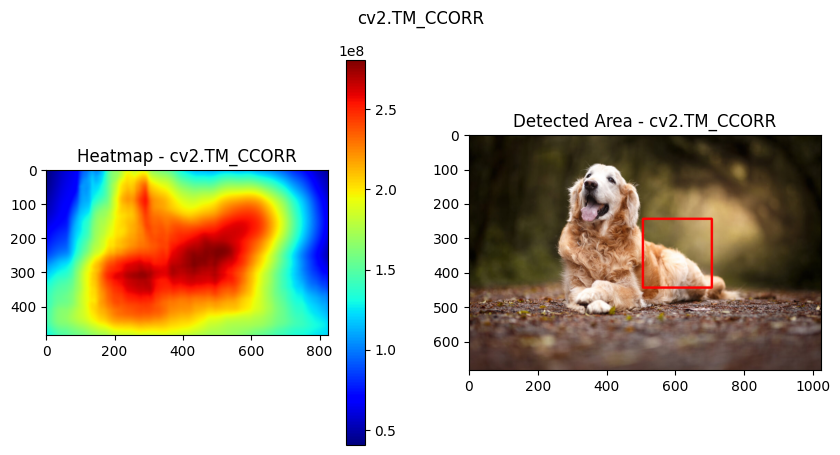

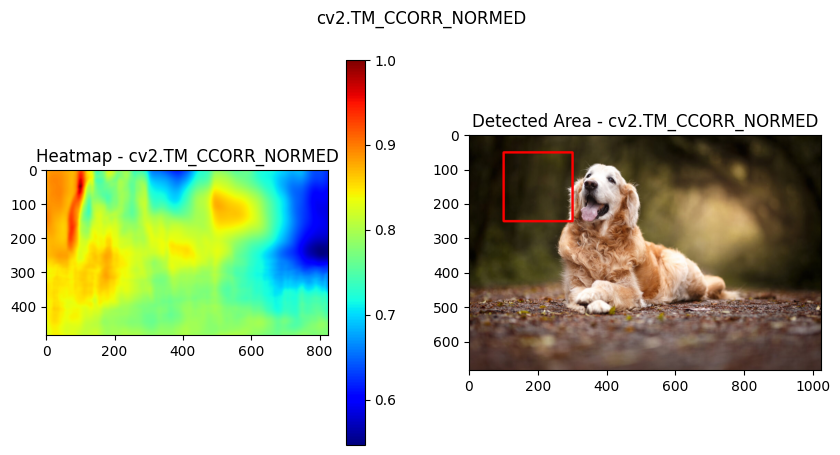

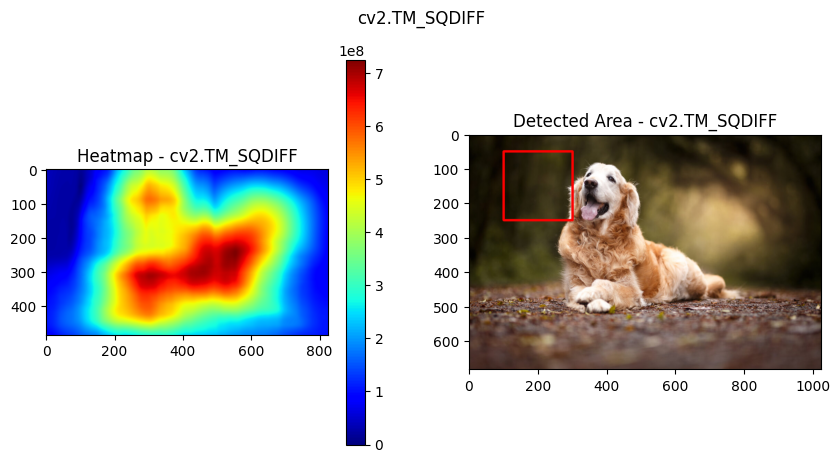

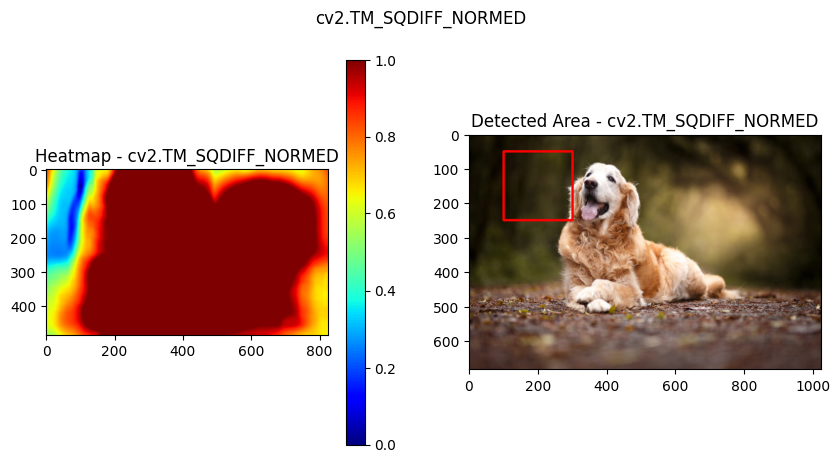

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the full image
full = cv2.imread('DATA/dog3.jpg')
full = cv2.cvtColor(full, cv2.COLOR_BGR2RGB)

# Define a region for the face (manually cropped for correct template matching)
# Adjust these values based on the face's location
x, y, w, h = 100, 50, 200, 200  # Modify according to your image
face = full[y:y+h, x:x+w]  # Crop face region

# Convert to grayscale for better template matching
full_gray = cv2.cvtColor(full, cv2.COLOR_RGB2GRAY)
face_gray = cv2.cvtColor(face, cv2.COLOR_RGB2GRAY)

# Define all the six methods for template matching
methods = [
    'cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 
    'cv2.TM_CCORR', 'cv2.TM_CCORR_NORMED', 
    'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED'
]

for m in methods:
    full_copy = full.copy()  # Make a copy to draw rectangles
    method = eval(m)

    # Apply template matching
    res = cv2.matchTemplate(full_gray, face_gray, method)

    # Get min/max locations
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    # For TM_SQDIFF methods, use min_loc; otherwise, use max_loc
    top_left = min_loc if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED] else max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    # Draw a rectangle around the detected region
    cv2.rectangle(full_copy, top_left, bottom_right, (255, 0, 0), 5)

    # Plot results
    plt.figure(figsize=(10, 5))

    # Heatmap visualization
    plt.subplot(1, 2, 1)
    plt.imshow(res, cmap='jet')
    plt.title(f'Heatmap - {m}')
    plt.colorbar()

    # Detected area visualization
    plt.subplot(1, 2, 2)
    plt.imshow(full_copy)
    plt.title(f'Detected Area - {m}')

    plt.suptitle(m)
    plt.show()
